## Group: Jingmin Chen, Tianyu Sun

# Introduction

In this project I'll use knowledge of data science and machine learning algorithms to predict cut level of diamonds. The dataset contains some attributes of diamond observations and cut level for prediction. My work will divided into several steps shown below.

1.  load data and understand meanings of each features
2.  perform some EDA to get some useful information for future work
3.  perform data preparation to make dataset suitable for ML models.
4.  perfrom variable selection to generate different datasets
5.  train models

Detail will be described in each step.

In [2]:
#load python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score, accuracy_score, confusion_matrix, make_scorer, classification_report, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

## Load data

In this part I'll load data from file and try to understand meanings of each attribute.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/TTZUO/DAV-6150/master/Project3_Data.csv')

print(data.shape)
print(data.columns)

(53940, 10)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


There are 53940 observations with 10 features (1 response variable and 9 explanatory variables).

Here are meanings of features.

-   `price`: price in US dollars (\$326--\$18,823)

-   `carat`: weight of the diamond (0.2--5.01)

-   `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

-   `color`: diamond colour, from D (best) to J (worst)

-   `clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

-   `x`: length in mm (0--10.74)

-   `y`: width in mm (0--58.9)

-   `z`: depth in mm (0--31.8)

-   `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

-   `table`: width of top of diamond relative to widest point (43--95)

## EDA

In this part I'll perform some EDA on the dataset to explore some basic features of dataset along with distributions of each variable and relationship between variables.

Take a look on the dataset

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
np.unique(data.cut)

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
categorial_var = ['color', 'clarity']
numeric_var = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
response_var = 'cut'

In [8]:
for f in categorial_var:
    print(f)
    print('\n{}'.format(str(np.unique(data[f]))))

color

['D' 'E' 'F' 'G' 'H' 'I' 'J']
clarity

['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


As we can see that there are 3 categorial variables (including response variable) and 7 numerical variables. And response variable has 5 valid values. 

Categorial variables:
-   `cut`: 'Fair' 'Good' 'Ideal' 'Premium' 'Very Good'
-   `color`: 'D' 'E' 'F' 'G' 'H' 'I' 'J'
-   `clarity`: 'I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2'

Numerical variables:
-   `carat`
-   `depth`
-   `table`
-   `price`
-   `x`
-   `y`
-   `z`

In [9]:
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


It is a good news that there are no empty data entries in the dataset.

Now I'll explore distributions of each variable.

First, categorial variables.

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



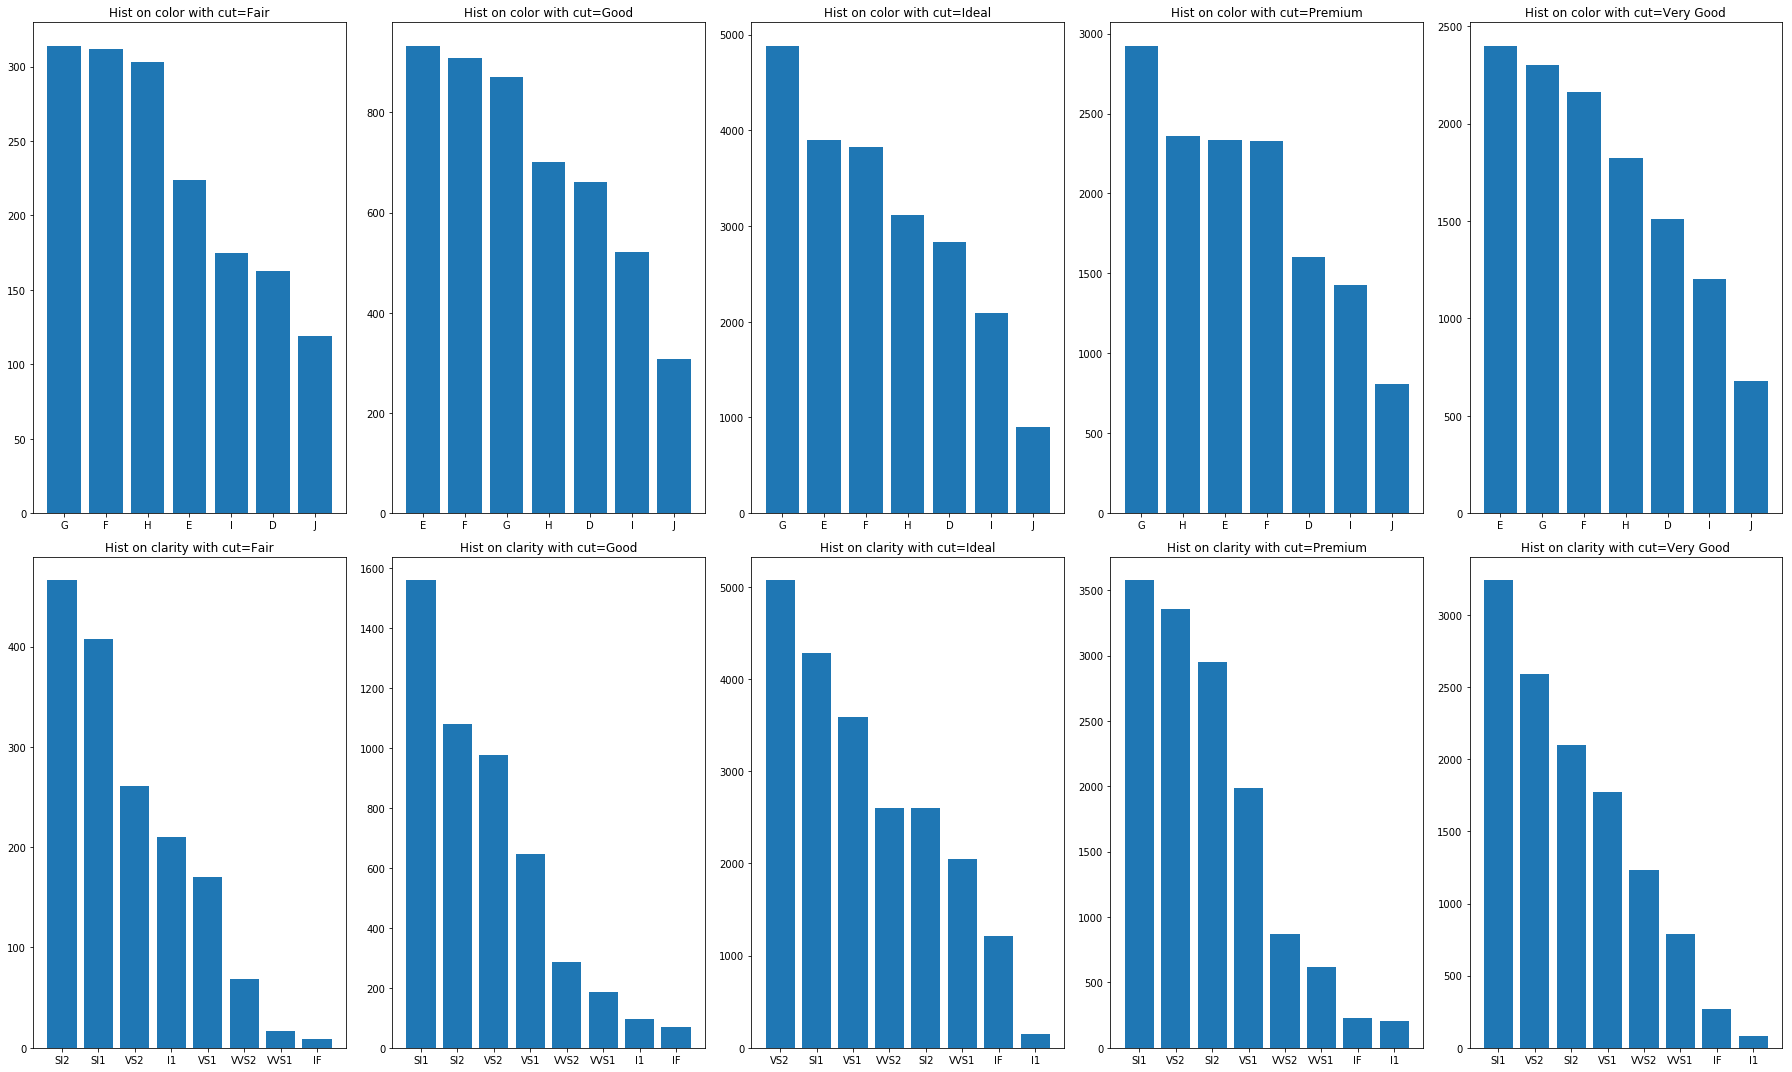

In [10]:
fig = plt.figure(figsize=(25, 15))

i = 1
for f in categorial_var:

    val_cnt = data[f].value_counts()
    print(f)
    print(val_cnt)
    print()

    for rv in np.unique(data[response_var]):
        
        plt.subplot(2, 5, i)
        val_cnt = data[f][data[response_var] == rv].value_counts()
        plt.bar(x=val_cnt.index, height=val_cnt.values)
        plt.title('Hist on {} with cut={}'.format(f, rv))
        plt.tight_layout()

        i += 1
plt.show()
        


As we can see that the distribution on each categorial variable when response variable equal to different value are similar. Maybe categorial data can't distinguish response variable very well.

Now for numeric variables.

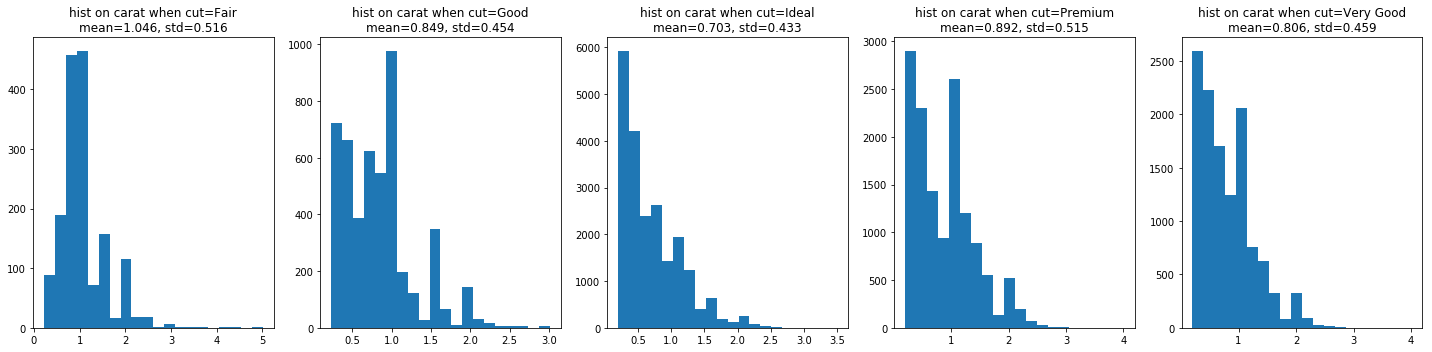

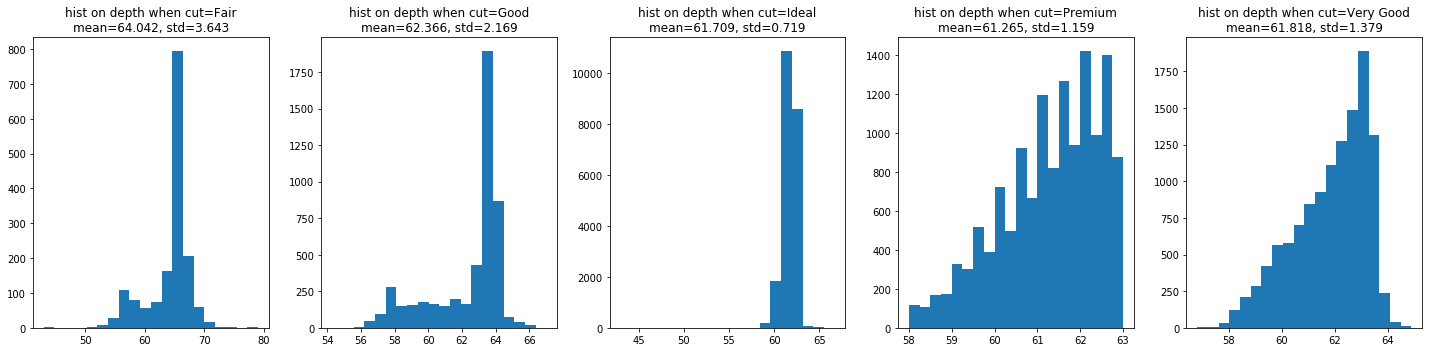

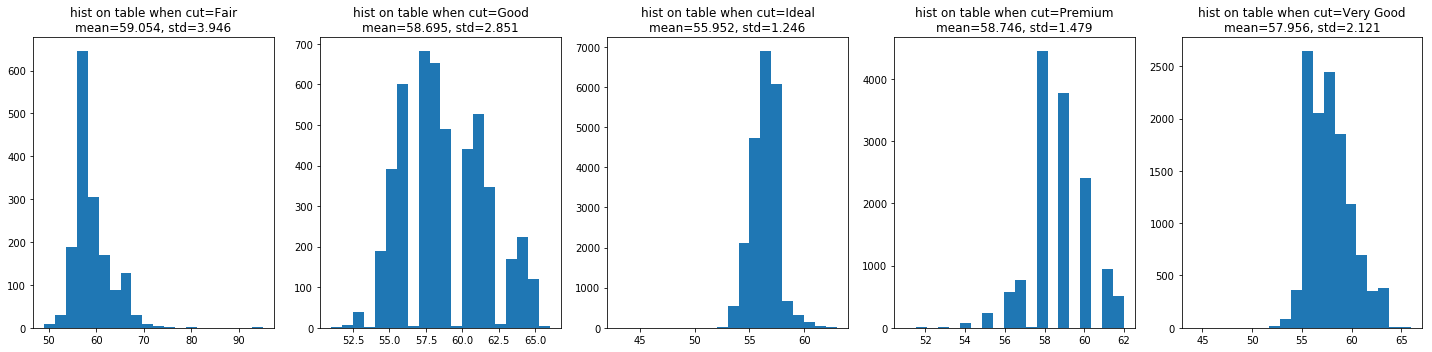

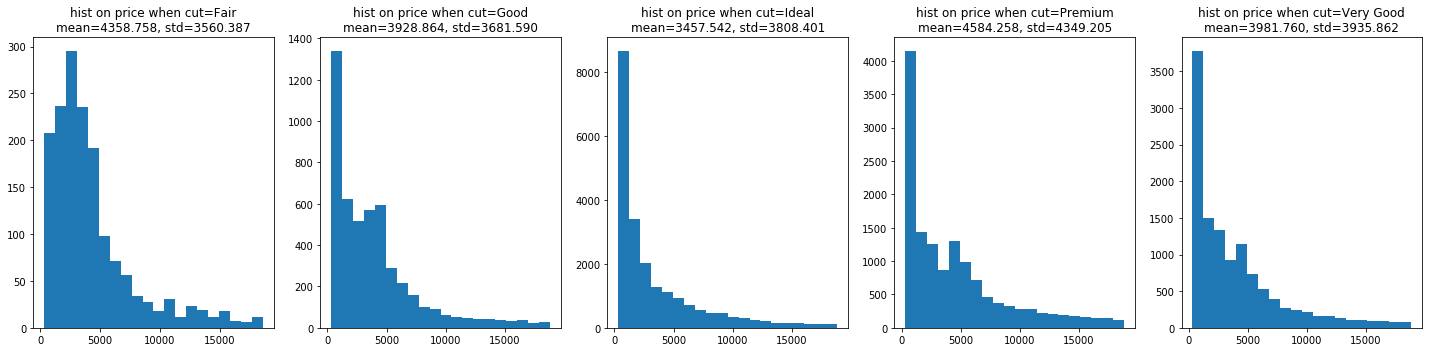

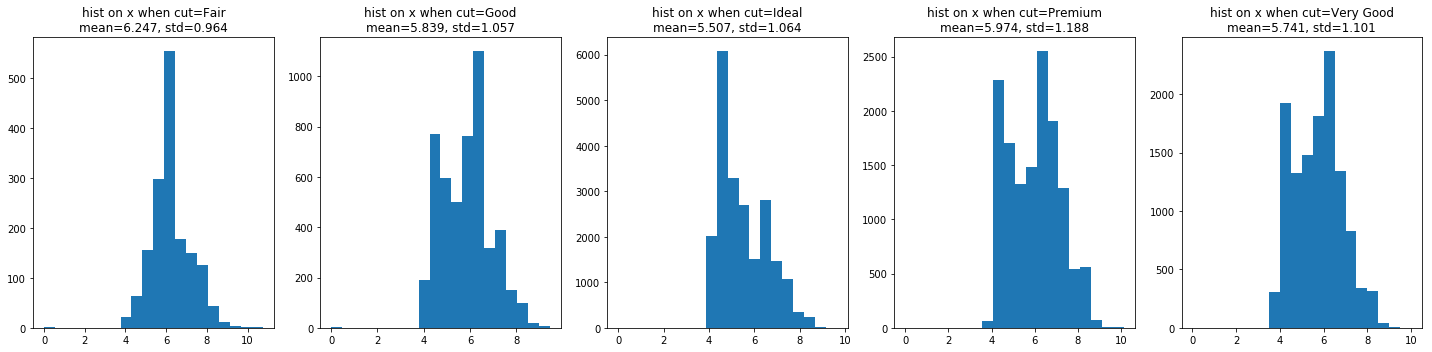

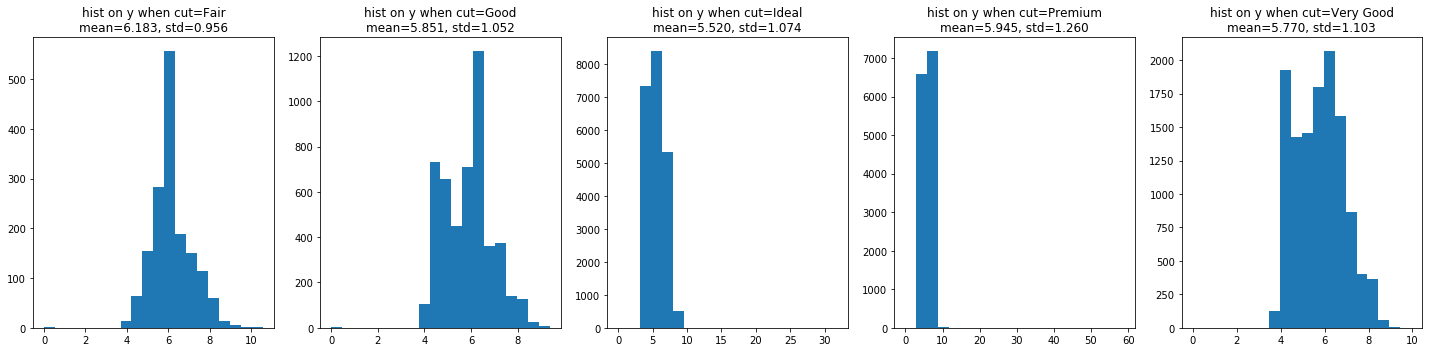

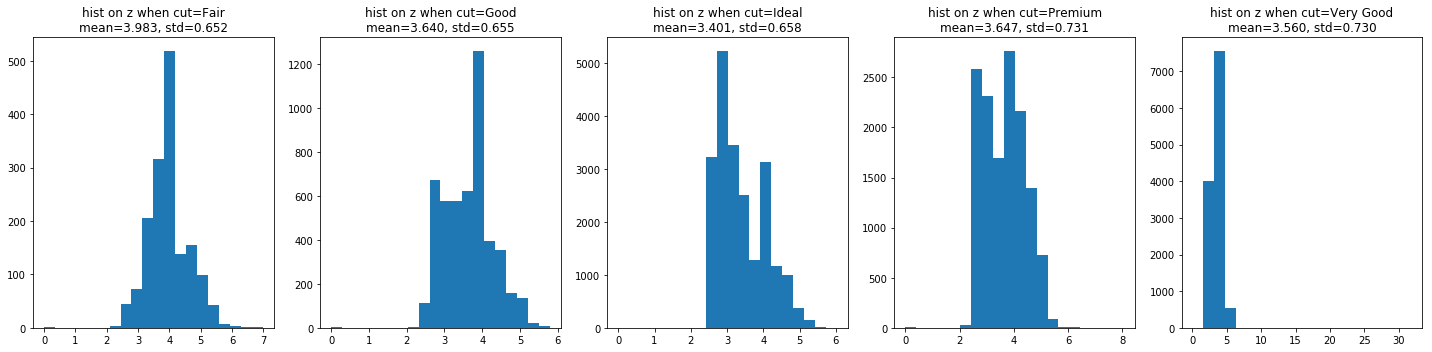

In [11]:
for f in numeric_var:

    fig = plt.figure(figsize=(20, 5))
    i = 1
    for rv in np.unique(data[response_var]):
        
        var = data[f][data[response_var] == rv]

        plt.subplot(1, 5, i)
        plt.hist(var, bins=20)
        plt.title('hist on {} when cut={}\nmean={:.3f}, std={:.3f}'.format(f, rv, var.mean(), var.std()))
        plt.tight_layout()

        i += 1
    plt.show()

As we can see that distribution of each variable on each response value are different. And we can see the difference by histograms, mean values and standard diviations. `carat`, `depth`, `table`, `y` and `z` seems to distinguish response value well. 

And then I'll measure relationship between explanatory variables and response variable. I'll use mutual information score to measure relationship between categorial explanatory variables and response variable. Because mutual information score is suitable for categorial variables and numeric variables, and it measures how related the two variables are. 

In [12]:
nmi_score = {}

In [13]:
for f in categorial_var:

    score = normalized_mutual_info_score(data[f], data[response_var])
    nmi_score[f] = score
    print('{} ~ {}: {}'.format(f, response_var, score))

color ~ cut: 0.0017809332821957851
clarity ~ cut: 0.01997142089910553


In [14]:
for f in numeric_var:

    score = normalized_mutual_info_score(data[f], data[response_var])
    print('{} ~ {}: {}'.format(f, response_var, score))

    nmi_score[f] = score

carat ~ cut: 0.02835871355049845
depth ~ cut: 0.1339210871440799
table ~ cut: 0.17901399925955072
price ~ cut: 0.09635559387121434
x ~ cut: 0.033454565950991895
y ~ cut: 0.02866319151689924
z ~ cut: 0.02564928428040937


I can see the relationship between each explanatory variables and response variables by normalized mutual information score, higher value indicates more related. And these values can be useful in variable selection.

The result is similar to what we get from histograms. Categorial variables have a weak relationship with response variable so their NMI is small. And `depth`, `table` `price` have a high NMI value, these variables are regard as high-related variabels with response variable when I took a look at the histograms.

## Variable selection

Variable selection will based on NMI score obtained previously. I think variables with a higher NMI score may help to prediction. Because these variable are strong related to response variable and there may be some hidden information between them which can be explored by ML model. These hidden information may help ML model to perform prediction.

I'll set thershold to 0.02 to determain which variable will remain.

In [16]:
remaining_var = []
thresh = 0.02

for k, v in nmi_score.items():

    if v > 0.02:
        remaining_var.append(k)
print(remaining_var)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


There are 7 variable remaining.

## Data preparation and training model

At first I'll convert the dataset to suitable format for ML models and split it into train subset and test subset. And then I'll fit the train set to each model.

Data preparation

In [17]:
new_data = data[remaining_var]
label = data[response_var]

We know that response variable is categorial variable and it is comparable (it is absolutely that a diamond with 'Very Good' cut is better then just 'Good'), so it is ok to convert this variable into numeric format ('Fair'=0, 'Good'=1, 'Ideal'=2, 'Premium'=3, 'Very Good'=4).

In [18]:
label[label == 'Fair'] = 0
label[label == 'Good'] = 1
label[label == 'Ideal'] = 2
label[label == 'Premium'] = 3
label[label == 'Very Good'] = 4

label = label.astype(np.int)

Remaining variables are all numeric variables, no transformation needed.

Train-Test split with train size 0.7

In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_data, label, train_size=0.7)

Then construct some ML models

In [20]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
sgd = SGDClassifier()
xgb = XGBClassifier()

I'll run each model on train set and evaluate their performance by accuracy

In [21]:
# using 5-fold cross validation
k = 5

In [22]:
cv_acc = cross_val_score(dt, X_train, y_train, cv=k, scoring=make_scorer(accuracy_score))
print('Acc on decision tree: {}'.format(cv_acc.mean()))

cv_acc = cross_val_score(rf, X_train, y_train, cv=k, scoring=make_scorer(accuracy_score))
print('Acc on Random Forest: {}'.format(cv_acc.mean()))

cv_acc = cross_val_score(gb, X_train, y_train, cv=k, scoring=make_scorer(accuracy_score))
print('Acc on Gradient Boosting: {}'.format(cv_acc.mean()))

cv_acc = cross_val_score(sgd, X_train, y_train, cv=k, scoring=make_scorer(accuracy_score))
print('Acc on Stochastic Gradient Descent: {}'.format(cv_acc.mean()))

cv_acc = cross_val_score(xgb, X_train, y_train, cv=k, scoring=make_scorer(accuracy_score))
print('Acc on XGBoost: {}'.format(cv_acc.mean()))

Acc on decision tree: 0.6999836808852347
Acc on Random Forest: 0.7771332972510095
Acc on Gradient Boosting: 0.7598919157637669
Acc on Stochastic Gradient Descent: 0.34974798138196983
Acc on XGBoost: 0.7941892693245254


Fit all models on entire train set.

In [75]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
sgd.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Now I'll test them on test set.

In [77]:
pred = dt.predict(X_test)
target_names = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(pred, y_test,target_names = target_names))

print(confusion_matrix(pred, y_test))

conf_mat = multilabel_confusion_matrix(pred, y_test,labels=[0,1,2,3,4])
conf_mat

              precision    recall  f1-score   support

        Fair       0.85      0.83      0.84       490
        Good       0.65      0.66      0.66      1442
   Very Good       0.79      0.80      0.80      6466
     Premium       0.73      0.74      0.73      4124
       Ideal       0.54      0.52      0.53      3660

    accuracy                           0.71     16182
   macro avg       0.71      0.71      0.71     16182
weighted avg       0.71      0.71      0.71     16182

[[ 409   46    8   13   14]
 [  45  953   40   51  353]
 [   8   35 5146  510  767]
 [  14   50  491 3044  525]
 [   7  371  791  571 1920]]


array([[[15618,    74],
        [   81,   409]],

       [[14238,   502],
        [  489,   953]],

       [[ 8386,  1330],
        [ 1320,  5146]],

       [[10913,  1145],
        [ 1080,  3044]],

       [[10863,  1659],
        [ 1740,  1920]]])

In [44]:
pred = rf.predict(X_test)
target_names = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(pred, y_test,target_names = target_names))

print(confusion_matrix(pred, y_test))

conf_mat = multilabel_confusion_matrix(pred, y_test,labels=[0,1,2,3,4])
conf_mat

              precision    recall  f1-score   support

        Fair       0.86      0.89      0.87       469
        Good       0.66      0.74      0.69      1281
   Very Good       0.90      0.81      0.85      7120
     Premium       0.76      0.67      0.71      4755
       Ideal       0.40      0.57      0.47      2557

    accuracy                           0.73     16182
   macro avg       0.71      0.74      0.72     16182
weighted avg       0.76      0.73      0.74     16182

[[ 419   42    2    2    4]
 [  43  944   13   44  237]
 [   3   29 5778  466  844]
 [  12  127  346 3168 1102]
 [  13  294  299  496 1455]]


array([[[15642,    71],
        [   50,   419]],

       [[14409,   492],
        [  337,   944]],

       [[ 8402,   660],
        [ 1342,  5778]],

       [[10419,  1008],
        [ 1587,  3168]],

       [[11438,  2187],
        [ 1102,  1455]]])

In [78]:
pred = gb.predict(X_test)
target_names = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(pred, y_test,target_names = target_names))

print(confusion_matrix(pred, y_test))

conf_mat = multilabel_confusion_matrix(pred, y_test,labels=[0,1,2,3,4])
conf_mat

              precision    recall  f1-score   support

        Fair       0.89      0.90      0.90       477
        Good       0.65      0.83      0.73      1138
   Very Good       0.92      0.81      0.86      7300
     Premium       0.85      0.71      0.77      5030
       Ideal       0.43      0.69      0.53      2237

    accuracy                           0.77     16182
   macro avg       0.75      0.79      0.76     16182
weighted avg       0.81      0.77      0.78     16182

[[ 431   39    3    0    4]
 [  28  942    6    2  160]
 [   4   20 5934  475  867]
 [  16  130  311 3558 1015]
 [   4  324  222  154 1533]]


array([[[15653,    52],
        [   46,   431]],

       [[14531,   513],
        [  196,   942]],

       [[ 8340,   542],
        [ 1366,  5934]],

       [[10521,   631],
        [ 1472,  3558]],

       [[11899,  2046],
        [  704,  1533]]])

In [80]:
pred = sgd.predict(X_test)
target_names = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(pred, y_test,target_names = target_names))

print(confusion_matrix(pred, y_test))

conf_mat = multilabel_confusion_matrix(pred, y_test,labels=[0,1,2,3,4])
conf_mat

              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00         0
        Good       0.84      0.08      0.15     14642
   Very Good       0.15      0.62      0.24      1540
     Premium       0.00      0.00      0.00         0
       Ideal       0.00      0.00      0.00         0

    accuracy                           0.13     16182
   macro avg       0.20      0.14      0.08     16182
weighted avg       0.77      0.13      0.16     16182

[[   0    0    0    0    0]
 [ 441 1216 5524 4167 3294]
 [  42  239  952   22  285]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


array([[[15699,   483],
        [    0,     0]],

       [[ 1301,   239],
        [13426,  1216]],

       [[ 9118,  5524],
        [  588,   952]],

       [[11993,  4189],
        [    0,     0]],

       [[12603,  3579],
        [    0,     0]]])

In [79]:
pred = xgb.predict(X_test)
target_names = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(pred, y_test,target_names = target_names))

print(confusion_matrix(pred, y_test))

conf_mat = multilabel_confusion_matrix(pred, y_test,labels=[0,1,2,3,4])
conf_mat

              precision    recall  f1-score   support

        Fair       0.88      0.91      0.90       464
        Good       0.69      0.80      0.74      1254
   Very Good       0.92      0.82      0.87      7224
     Premium       0.81      0.83      0.82      4090
       Ideal       0.61      0.69      0.64      3150

    accuracy                           0.80     16182
   macro avg       0.78      0.81      0.79     16182
weighted avg       0.81      0.80      0.80     16182

[[ 424   32    3    0    5]
 [  35 1009    8    3  199]
 [   4   18 5949  476  777]
 [  16   30  220 3392  432]
 [   4  366  296  318 2166]]


array([[[15659,    59],
        [   40,   424]],

       [[14482,   446],
        [  245,  1009]],

       [[ 8431,   527],
        [ 1275,  5949]],

       [[11295,   797],
        [  698,  3392]],

       [[11619,  1413],
        [  984,  2166]]])

## Conclusion

From accuracy on cross validation, the XGBoost seems to be the best model which has highest accuracy score. For performance on test set, it still has highest accuracy score. When we concern about how many "true" items are classified correctly, the XGBoost model is still the best which has highest recall score. So I think the best model is XGBoost.